Residual Sum of Squares (RSS): 3461.5108999999998

Feature Importances:
     Feature  Importance
5   meal.cal    0.276526
6    wt.loss    0.256943
0       time    0.206354
3    ph.ecog    0.111414
4  pat.karno    0.084826
2        sex    0.044582
1     status    0.019355


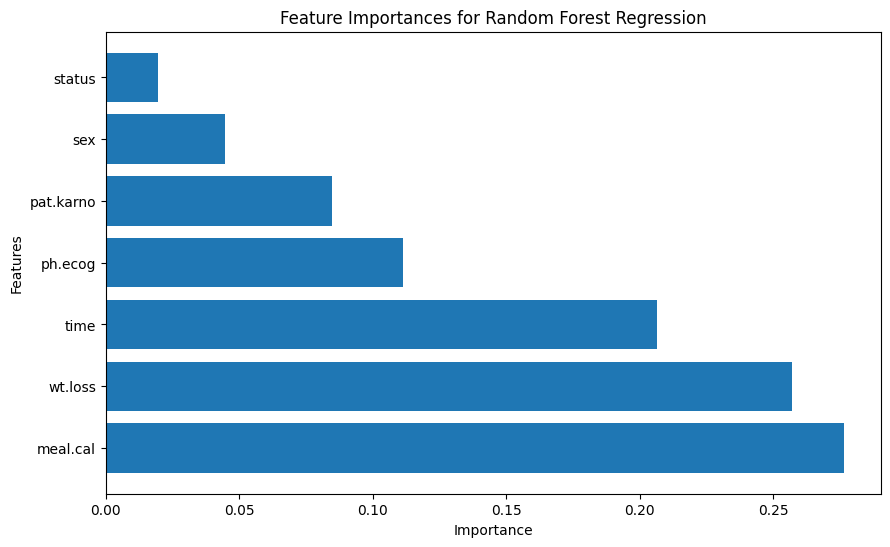

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from pydataset import data
import matplotlib.pyplot as plt

# Load the 'cancer' dataset from pydataset
df = data('cancer')

# Drop rows with missing values
df = df.dropna()

# Select independent variables (X) and the target variable (y)
X = df[['time', 'status', 'sex', 'ph.ecog', 'pat.karno', 'meal.cal', 'wt.loss']]
y = df['age']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create and train the RandomForestRegressor model
h = RandomForestRegressor(n_estimators=100, random_state=1)
h.fit(x_train, y_train)

# Make predictions on the test set
y_pred = h.predict(x_test)

# Calculate Residuals
residuals = y_test - y_pred

# Calculate Residual Sum of Squares (RSS)
rss = sum(residuals**2)
print("Residual Sum of Squares (RSS):", rss)

# Get feature importances
feature_importances = h.feature_importances_

# Create a DataFrame to store feature importances with corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for Random Forest Regression')
plt.show()
